In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from keras import layers
from tensorflow.keras.models import Model

In [15]:
import numpy as np
from keras.utils import to_categorical
from keras.applications import VGG16
from keras import layers
from keras.models import Model
from keras.datasets import mnist
from cv2 import resize

# Завантаження набору даних MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормалізація значень пікселів до діапазону [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Збільшення розмірів зображень та додавання третього каналу
x_train_resized = np.array([resize(image, (32, 32)) for image in x_train])
x_train_resized = np.expand_dims(x_train_resized, axis=-1)  # Додати третій канал
x_train_resized = np.repeat(x_train_resized, 3, axis=-1)  # Повторити канал тричі
x_test_resized = np.array([resize(image, (32, 32)) for image in x_test])
x_test_resized = np.expand_dims(x_test_resized, axis=-1)
x_test_resized = np.repeat(x_test_resized, 3, axis=-1)

# Конвертація міток в формат one-hot encoded
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Побудова моделі VGG16
def model_VGG16(learning_rate, epochs, batch_size):
    base_model = VGG16(
        include_top=False,
        weights='imagenet',
        pooling='avg',
        input_shape=(32, 32, 3)  # Вказуємо очікуваний розмір вхідних даних
    )

    # Додавання власних шарів
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.25)(x)
    predictions = layers.Dense(10, activation='softmax')(x)

    # Створення фінальної моделі
    model = Model(inputs=base_model.input, outputs=predictions)

    # Компіляція
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Тренування моделі
    history = model.fit(
        x_train_resized, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2
    )

    # Оцінка моделі
    test_loss, test_accuracy = model.evaluate(x_test_resized, y_test)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    return model, history

# Гіперпараметри
learning_rate = 0.001
epochs = 15
batch_size = 200

# Тренування та оцінка моделі
model, history = model_VGG16(learning_rate, epochs, batch_size)


Epoch 1/15


240/240 [==============================] - 1013s 4s/step - loss: 1.3952 - accuracy: 0.4666 - val_loss: 0.3696 - val_accuracy: 0.8963
Epoch 2/15
240/240 [==============================] - 992s 4s/step - loss: 0.2096 - accuracy: 0.9448 - val_loss: 0.1028 - val_accuracy: 0.9743
Epoch 3/15
240/240 [==============================] - 1017s 4s/step - loss: 0.0837 - accuracy: 0.9789 - val_loss: 0.0829 - val_accuracy: 0.9760
Epoch 4/15
240/240 [==============================] - 955s 4s/step - loss: 0.0487 - accuracy: 0.9875 - val_loss: 0.0581 - val_accuracy: 0.9822
Epoch 5/15
240/240 [==============================] - 945s 4s/step - loss: 0.0445 - accuracy: 0.9889 - val_loss: 0.0541 - val_accuracy: 0.9899
Epoch 6/15
240/240 [==============================] - 939s 4s/step - loss: 0.0365 - accuracy: 0.9908 - val_loss: 0.0575 - val_accuracy: 0.9877
Epoch 7/15
240/240 [==============================] - 945s 4s/step - loss: 0.0485 - accuracy: 0.9884 - val_loss: 0.0489 - val_accuracy: 0.

In [16]:
# Збереження моделі до файлу
model.save('model_VGG16_super.h5')

c:\users\tatya\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


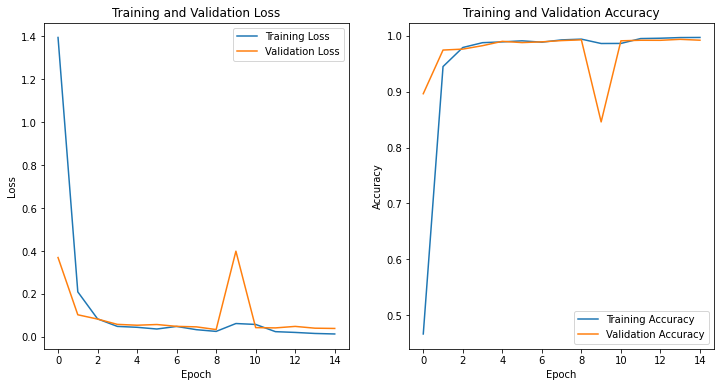

In [17]:
import matplotlib.pyplot as plt

# Функція для побудови графіків
def plot_history(history):
    # Графік функції втрат
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Графік точності
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Побудова графіків
plot_history(history)

1/1 [==============================] - 0s 81ms/step


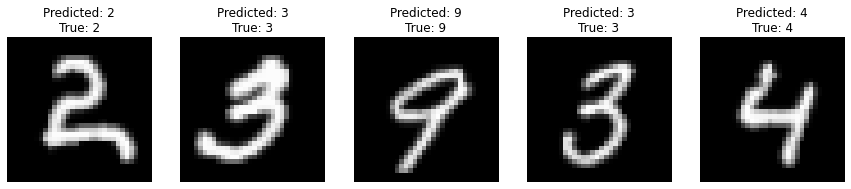

In [20]:
# Візуалізація результатів розпізнавання
visualize_predictions(model, x_test_resized, y_test)

In [21]:
from sklearn.metrics import classification_report

# Отримання передбачень моделі для тестових даних
predictions = model.predict(x_test_resized)

# Перетворення передбачень у масив індексів класів
predicted_classes = np.argmax(predictions, axis=1)

# Перетворення one-hot закодованих міток у масив індексів класів
true_classes = np.argmax(y_test, axis=1)

# Виведення класифікаційного звіту
print(classification_report(true_classes, predicted_classes))

313/313 [==============================] - 52s 165ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [23]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   